# Домашнее задание 1
## Гаркавый Андрей, 494 группа

### 1. Метод k ближайших соседей

In [4]:
from sklearn import cross_validation, datasets, metrics, neighbors, model_selection
from matplotlib.colors import ListedColormap
import numpy as np
%pylab inline

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [5]:
colors = ListedColormap(['red', 'blue', 'purple', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'pink', 'lightgreen'])

def plot_2d_dataset(data, colors):
    pyplot.figure(figsize(8, 8))
    pyplot.scatter(list(map(lambda x: x[0], data[0])), list(map(lambda x: x[1], data[0])), c=data[1], cmap=colors)

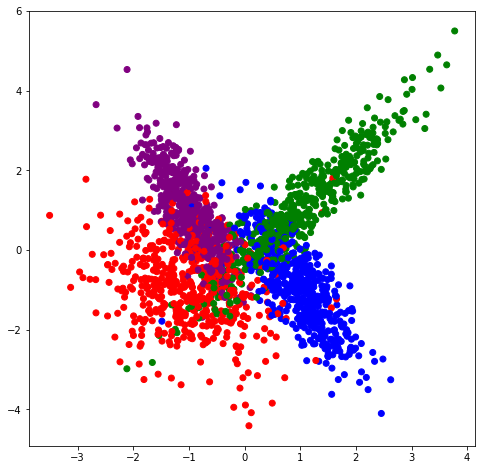

In [6]:
classification_problem = datasets.make_classification(n_samples=2000, n_features=2, n_informative=2,
                                                      n_classes=4, n_redundant=0, n_clusters_per_class=1,
                                                      random_state=1)
plot_2d_dataset(classification_problem, colors)

In [7]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [8]:
estimator = neighbors.KNeighborsClassifier()
estimator.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
predictions = estimator.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.83499999999999996

In [10]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [11]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [12]:
def plot_decision_surface_neighbors(k):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

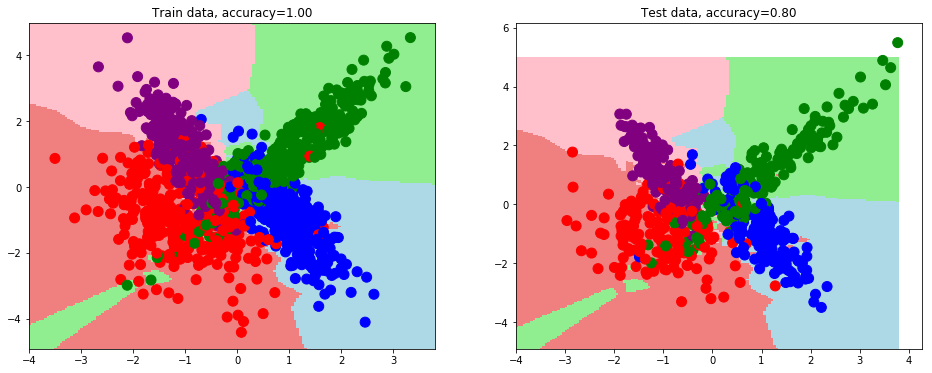

In [13]:
plot_decision_surface_neighbors(1)

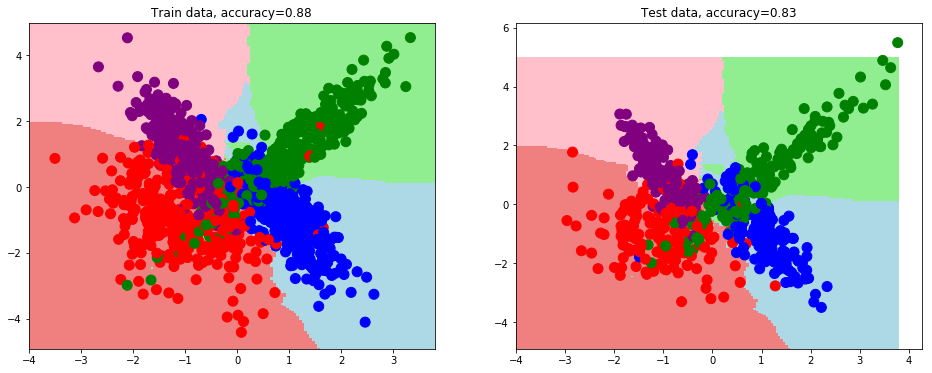

In [14]:
plot_decision_surface_neighbors(5)

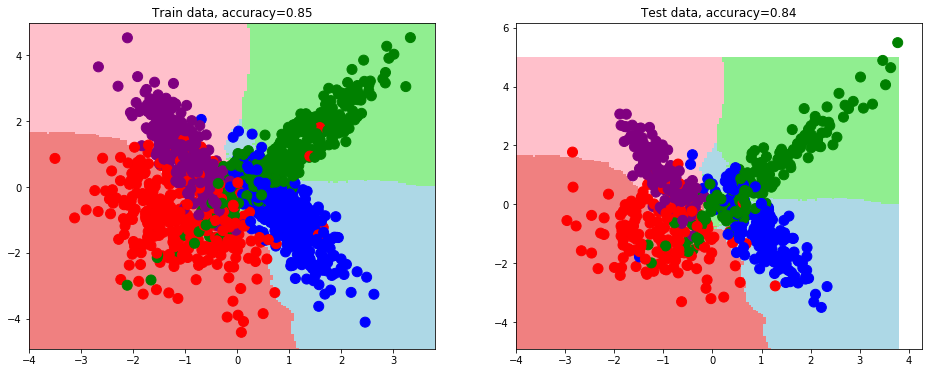

In [15]:
plot_decision_surface_neighbors(15)

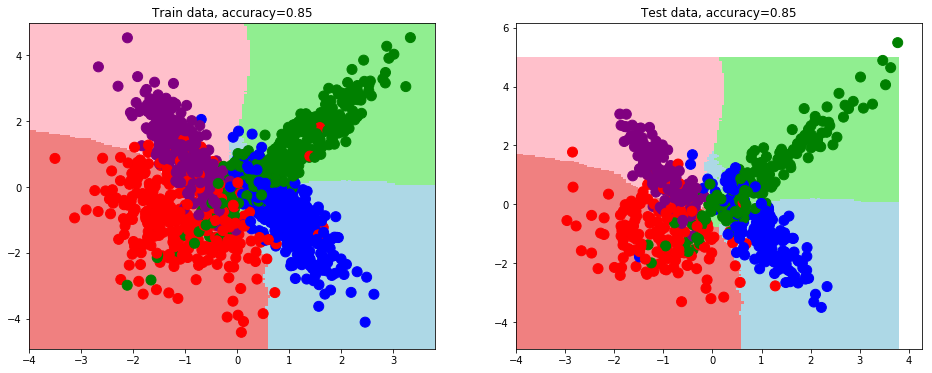

In [16]:
plot_decision_surface_neighbors(32)

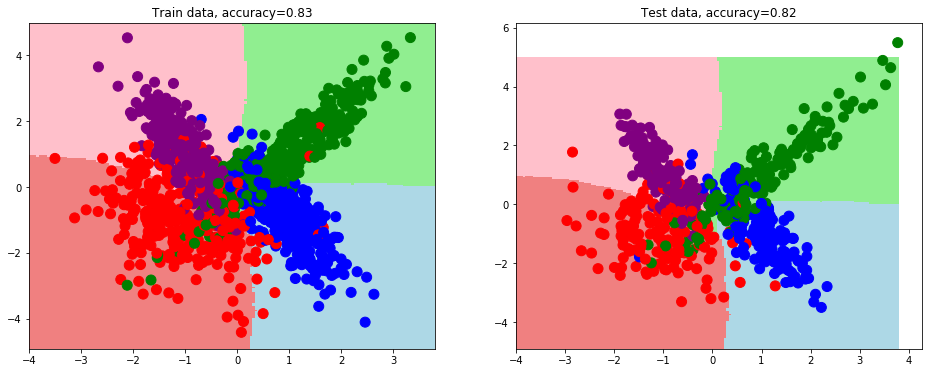

In [17]:
plot_decision_surface_neighbors(120)

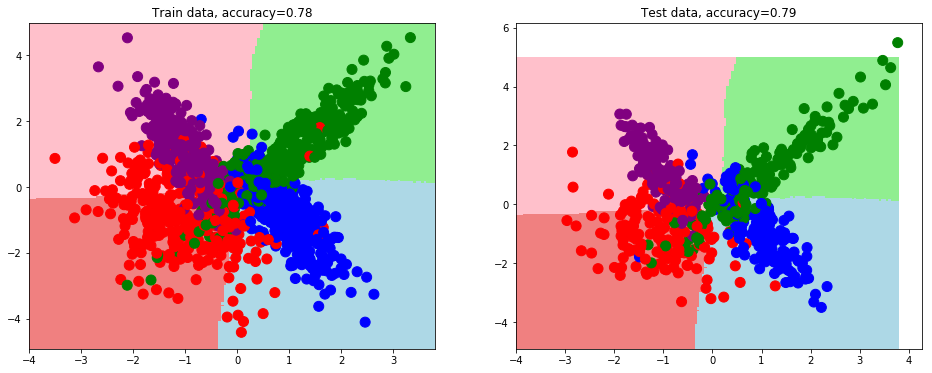

In [18]:
plot_decision_surface_neighbors(500)

In [19]:
MAX_NEIGHBORS = 100
accuracy = []
for k in range(1, MAX_NEIGHBORS + 1):
    scores = []
    for train_indices, test_indices in model_selection.KFold(n_splits=5).split(classification_problem[0]):
        train_data = classification_problem[0][train_indices]
        train_labels = classification_problem[1][train_indices]
        test_data = classification_problem[0][test_indices]
        test_labels = classification_problem[1][test_indices]
        
        estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
        estimator.fit(train_data, train_labels)
        predictions = estimator.predict(test_data)
        scores.append(metrics.accuracy_score(test_labels, predictions))
    accuracy.append(np.mean(scores))

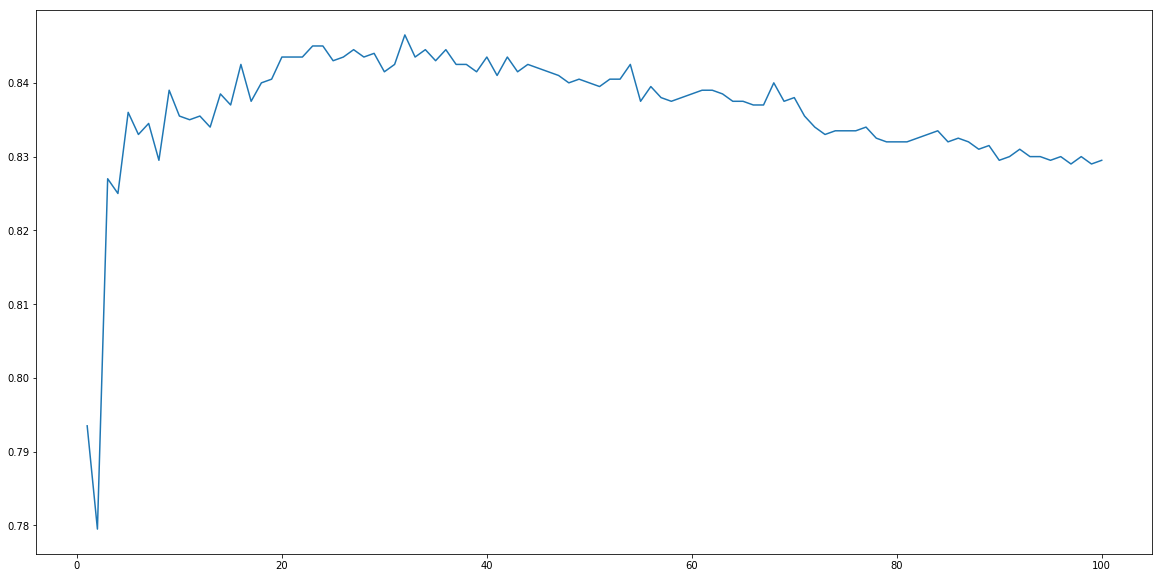

the best K is 32


In [20]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(1, MAX_NEIGHBORS + 1), accuracy)
plt.show()

print("the best K is", 1 + argmax(accuracy))

### 2. Наивный байесовский классификатор

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

In [24]:
data_digits = datasets.load_digits()
data_breast_cancer = datasets.load_breast_cancer()

In [25]:
print(data_digits['data'])
print(data_breast_cancer['data'])

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[[  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02 ...,   1.86000000e-01
    2.75000000e-01   8.90200000e-02]
 [  1.96900000e+01   2.12500000e+01   1.30000000e+02 ...,   2.43000000e-01
    3.61300000e-01   8.75800000e-02]
 ..., 
 [  1.66000000e+01   2.80800000e+01   1.08300000e+02 ...,   1.41800000e-01
    2.21800000e-01   7.82000000e-02]
 [  2.06000000e+01   2.93300000e+01   1.40100000e+02 ...,   2.65000000e-01
    4.08700000e-01   1.24000000e-01]
 [  7.76000000e+00   2.45400000e+01   4.79200000e+01 ...,   0.00000000e+00
    2.87100000e-01   7.03900000e-02]]


digits - целые неотрицательные признаки

breast_cancer - вещественные признаки

In [26]:
for data in (data_digits, data_breast_cancer):
    for estimator in (BernoulliNB(), MultinomialNB(), GaussianNB()):
        print(cross_val_score(estimator=estimator, X=data.data, y=data.target).mean())
    print()

0.825823650778
0.870877148974
0.818600380355

0.627420402859
0.894579040193
0.936749280609



1. Каким получилось максимальное качество классификации на датасете breast_cancer?

    $94\%$
    
2. Каким получилось максимальное качество классификации на датасете digits?

    $87\%$
    
3. Какие утверждения из приведенных ниже верны?

    (a) На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли
     
    Нет, хуже
     
    (b) На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным
    распределением
     
    Нет, с Гауссовым распределением
     
    (c) Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков
    
    Да, лучше, чем Гауссово и Бернулли. Нет, хуже чем с вещественными признаками
    
    (d) *На вещественных признаках лучше всего сработало нормальное распределение*
     
    Да

### 3. Метрики в задаче регрессии

In [62]:
from scipy import stats as sps
from scipy.optimize import minimize

In [74]:
MIN = -10
MAX = 10

x = sps.uniform.rvs(MIN, MAX - MIN, size=500)
y = 0.5 * x + 1 + sps.norm.rvs(scale=0.2 ** 0.5, size=500)

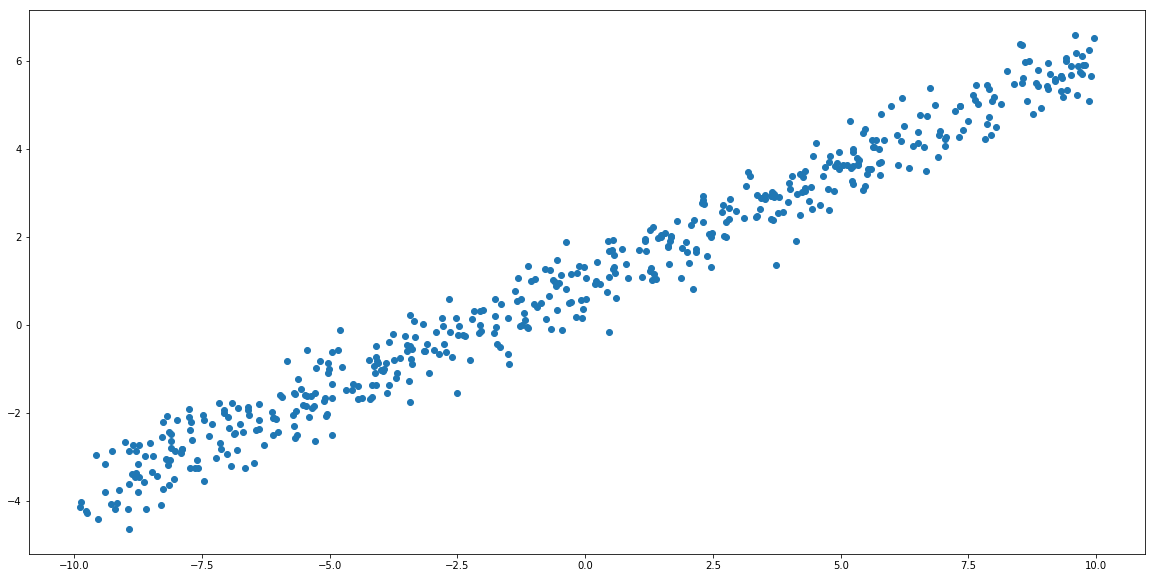

In [75]:
plt.figure(figsize=(20, 10))
plt.scatter(x, y)
plt.show()

In [76]:
def function_mse(args):
    k, b = args
    return ((k * x + b - y) ** 2).mean()

def function_mae(args):
    k, b = args
    return np.abs(k * x + b - y).mean()

In [77]:
mse = minimize(function_mse, [0, 0])
mae = minimize(function_mae, [0, 0])
print(mse)
print()
print(mae)

      fun: 0.22413098492403824
 hess_inv: array([[ 0.01555316,  0.00479266],
       [ 0.00479266,  1.00393264]])
      jac: array([  1.63912773e-07,   2.42143869e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([ 0.4999781 ,  1.02264583])

      fun: 0.37848766814651036
 hess_inv: array([[  5.98041558e-06,   5.36401568e-05],
       [  5.36401568e-05,   3.24649297e-01]])
      jac: array([ 0.00247844,  0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 451
      nit: 10
     njev: 110
   status: 2
  success: False
        x: array([ 0.50240869,  1.01370381])


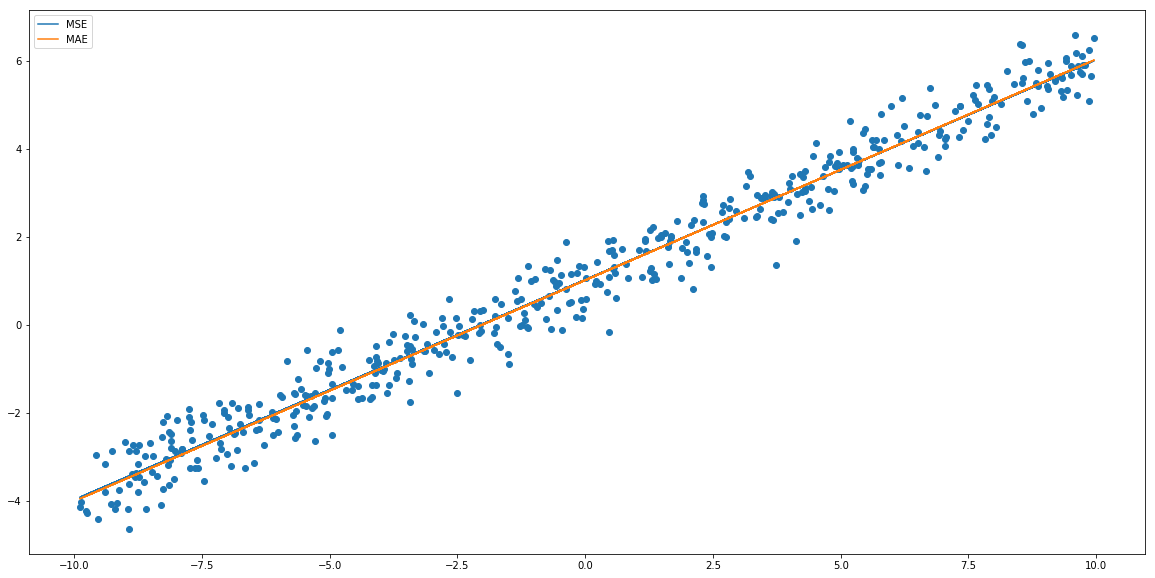

In [78]:
k_mse, b_mse = mse.x
k_mae, b_mae = mae.x

plt.figure(figsize=(20, 10))
plt.scatter(x, y)
plt.plot(x, k_mse * x + b_mse, label="MSE")
plt.plot(x, k_mae * x + b_mae, label="MAE")
plt.legend()
plt.show()

In [80]:
new_x = np.append(x, sps.uniform.rvs(MIN, MAX - MIN, size=75))
new_y = np.append(y, -1 + sps.norm.rvs(scale=0.2 ** 0.5, size=75))

In [81]:
def function_mse(args):
    k, b = args
    return ((k * new_x + b - new_y) ** 2).mean()

def function_mae(args):
    k, b = args
    return np.abs(k * new_x + b - new_y).mean()

In [82]:
mse = minimize(function_mse, [0, 0])
mae = minimize(function_mae, [0, 0])
print(mse)
print()
print(mae)

      fun: 1.5886404915855898
 hess_inv: array([[ 0.01538811,  0.00626163],
       [ 0.00626163,  1.00294681]])
      jac: array([  1.93715096e-07,  -1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([ 0.43142489,  0.77433421])

      fun: 0.7068464887415729
 hess_inv: array([[ 0.00054595, -0.00166921],
       [-0.00166921,  0.00764435]])
      jac: array([ 0.00183568,  0.00104306])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 384
      nit: 9
     njev: 93
   status: 2
  success: False
        x: array([ 0.49134287,  0.99685401])


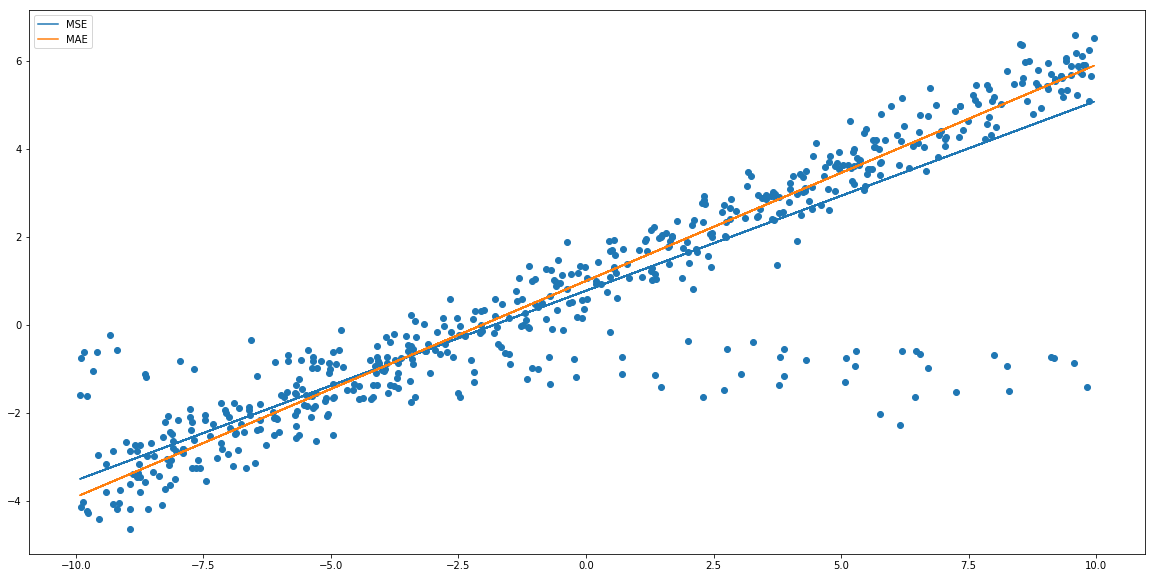

In [83]:
k_mse, b_mse = mse.x
k_mae, b_mae = mae.x

plt.figure(figsize=(20, 10))
plt.scatter(new_x, new_y)
plt.plot(new_x, k_mse * new_x + b_mse, label="MSE")
plt.plot(new_x, k_mae * new_x + b_mae, label="MAE")
plt.legend()
plt.show()

Видим, что MAE более устойчива к выбросам.